<a href="https://colab.research.google.com/github/ayrna/deep-learning-with-python-notebooks/blob/master/chapter03_introduction-to-keras-and-tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este cuaderno está basado en los cuadernos del libro [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff).

> This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.
> **If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**
> This notebook was generated for TensorFlow 2.6.

# Introducción a Keras y TensorFlow, PyTorch y JAX

Keras es un framework con un API de alto nivel de apstracción para desarrollar y desplegar modelos de aprendizaje profundo. Se usa ampliamente en la industria e investigación y es de los más populares en comunidades como Kaggle. 

Keras se puede utilizar junto con JAX, TensorFlow o PyTorch. Son los "marcos de trabajo de *backend*" de Keras. A través de estos *backend*, Keras puede ejecutarse en diferentes tipos de hardware (GPU, TPU o CPU), se puede escalar sin problemas a miles de máquinas y se puede implementar en una variedad de plataformas. Todo el código escrito con el API de Keras puede ejecutarse en los 3 entornos si bien debe importarse keras después de elegirlo. El backend por defecto es TensorFlow. 

* TensorFlow (https://tensorflow.org). 
* PyTorch (https://pytorch.org/). 
* JAX (https://jax.readthedocs.io/). 

Si bien en DL tenemos un contexto multi-framework el lenguaje claramente ganador es Python, aunque existan APIs para muchos otros populares en ciencia de datos. 

```python
import os

# Sets the environment variable from within the Python runtime
os.environ["KERAS_BACKEND"] = "jax"

# Only then should you import Keras.
import keras
```

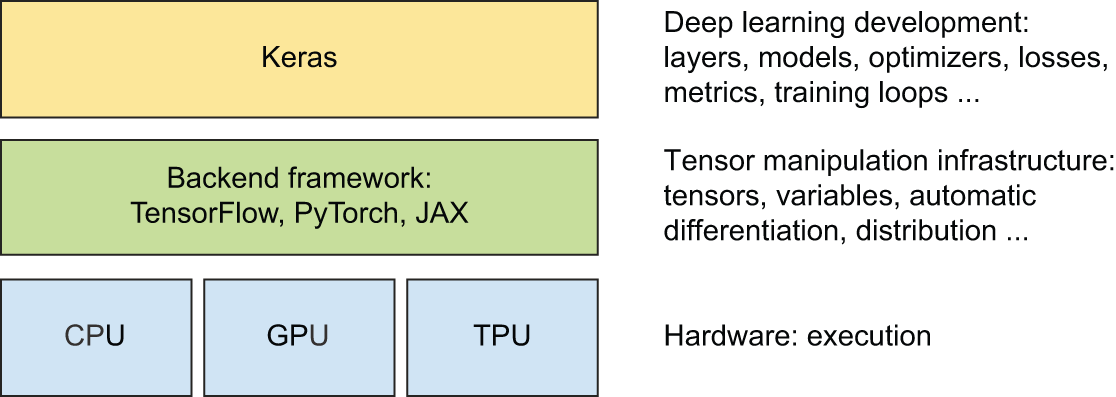


La última versión estable de Keras es la versión 3.0, que incluye estos tres backends y además NumPy con algunas limitaciones.

https://keras.io/

Puede interesarte mirar la galería de ejemplos:

https://keras.io/examples/

Y Keras Hub, que es la colección de modelos pre-entrenados: 

https://keras.io/keras_hub/

## ¿Cómo se relacionan estas herramientas?

Entrenar redes neuronales gira en torno a varios conceptos:

1. La manipulación de tensores a **bajo nivel**, la *infraestructura* que subyace a todo el aprendizaje automático moderno. Esto se traduce en las APIs de **TensorFlow**, **PyTorch** o **JAX**:
 * *Tensores*, incluyendo tensores especiales que almacenan el estado de la red (variables)
 * *Operaciones de tensor* como la `suma`, `relu`, `matmul`
 * *Retropropagación (Backpropagation)*, una forma de calcular el gradiente de expresiones matemáticas (e.j. en TensorFlow a través del objeto `GradientTape`)
2. Conceptos de aprendizaje profundo de **alto nivel**. Esto se traduce en las APIs de **Keras**:
 * *Capas*, que se combinan en un modelo
 * *Función de pérdida*, que define la señal de retroalimentación utilizada para el aprendizaje
 * *Optimizador*, que determina cómo se realiza el ajuste/aprendizaje a los datos.
 * *Métricas* para evaluar el rendimiento del modelo, como la precisión
 * Un *bucle de entrenamiento* que realiza el descenso de gradiente estocástico en mini lotes

Aquí vamos ver los ejemplos básicos con TensorFlow. Tienes el código equivalente para PyTorch y JAX en <https://deeplearningwithpython.io/chapters/chapter03_introduction-to-ml-frameworks/> 

## Primeros pasos con TensorFlow

TensorFlow es un marco de aprendizaje automático de código abierto basado en Python desarrollado principalmente por Google. Además de esto es una plataforma donde hay multitud de componentes, entre ellos muchos que facilitan el despliegue, y es por esto que se utiliza mucho en la industria. 

Los conceptos clave que vamos a ver son: 
 * Tensores y variables.
 * Operaciones numéricas en TF.
 * Calcular gradientes con `GradientTape`.
 * Hacer más eficiente la ejecución de funciones (just-in-time compilation).

NOTA. Si has instalado TF en local quizás te aparece este mensaje sobre los registros para operaciones con vectores:

```
This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
```

Puedes recompilar TF o deshabilitar estos mensajes: 

In [ ]:
# Para eliminar los mensajes sobre registros del procesador
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

#### Tensores constantes y variables

El tensor es la estructura de datos básica de TensorFlow y Keras. Deben crearse con un contenido y no se les puede asignar un valor.

Cuando es necesario cambiar el estado de una variable necesitaremos el tipo `tf.Variable`, que deben crearse con un valor inicial también.

**Tensores constantes**

In [ ]:
import tensorflow as tf
# Equivalent to np.ones(shape=(2, 1))
x = tf.ones(shape=(2, 1))
print(x)

In [ ]:
# Equivalent to np.zeros(shape=(2, 1))
x = tf.zeros(shape=(2, 1))
print(x)

In [ ]:
# Equivalent to np.array([1, 2, 3], dtype="float32")
tf.constant([1, 2, 3], dtype="float32")

**Tensores aleatorios**

In [ ]:
# np.random.normal(size=(3, 1), loc=0., scale=1.).
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

In [ ]:
# np.random.uniform(size=(3, 1), low=0., high=1.).
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

**Los arrays de NumPy son asignables pero los tensores no**

In [ ]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

In [ ]:
try:
  x = tf.ones(shape=(2, 2))
  x[0, 0] = 0.
except Exception as e:
  print(e)

**Crear un TensorFlow variable**

Para entrenar un modelo tenemos que modificar tensores, y para esto se usa el tipo `tf.Variable` que debe crearse siempre con un valor.

In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

**Asignar un valor a un TensorFlow variable**

In [ ]:
v.assign(tf.ones((3, 1)))

**Asignar un valor a un subconjunto de un TensorFlow variable**

In [ ]:
v[0, 0].assign(3.)

**Suma con `assign_add`**

In [ ]:
v.assign_add(tf.ones((3, 1)))

#### Operaciones matemáticas con Tensores

**Operaciones básicas**

In [ ]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

#### GradientTape API

**Cómo usar `GradientTape`**

Basta con abrir un *ámbito* de `GradientTape`, aplicar algún cálculo(s) a uno o varios tensores de entrada, y recuperar el gradiente del resultado con respecto a las entradas.

$f(x)=x^2$

$
\frac{\partial f}{\partial x} = 2x
$



In [ ]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
# la función sería f(x)=x^2; f'(x)=2x, siendo x = 3 f'(x)=6
print(input_var)
print(gradient)

**`GradientTape` con tensores constantes como entrada**

Hasta ahora, sólo hemos visto el caso en que los tensores de entrada en `tape.gradient()` eran variables TensorFlow. En realidad es posible que estas entradas sean cualquier tensor arbitrario. Sin embargo, sólo las variables entrenables son *rastreadas* por defecto. Con un tensor constante, hay que marcarlo manualmente como rastreado llamando a `tape.watch()` sobre él. Esto se hace por motivos de eficiencia computacional.

In [ ]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(result)
print(gradient)

### Acelerar las funciones de TensorFlow mediante la compilación

Todo el código que hemos ejecutado hasta ahora se ha ejecutado de forma interpretada y secuencialmente (a veces le llaman ejecución "ansiosa" o "eagerly"). El concepto de compilación a grandes rasgos consiste en reescribir el código Python de forma más rápida y eficiente para aprovechar paralelismos, reducir pasos de datos, etc. Esto dificulta-imposibilita la depuración de manera que la activaremos una vez hemos depurado nuestro código. 

Puedes aplicar la compilación a cualquier función de TensorFlow envolviéndola en un decorador `tf.function`, de la siguiente manera:

```python
# @tf.function(jit_compile=True) activaría la compilación con el compilador XLA de alto rendimiento
@tf.function
def dense(inputs, W, b):
    return tf.nn.relu(tf.matmul(inputs, W) + b)
``` 

In [ ]:
# Ejemplo de la documentación de TF https://www.tensorflow.org/guide/function?hl=es-419
import timeit
conv_layer = tf.keras.layers.Conv2D(100, 3)

@tf.function
def conv_fn(image):
  return conv_layer(image)

image = tf.zeros([1, 200, 200, 100])
# Warm up
conv_layer(image); conv_fn(image)
print("Eager conv:", timeit.timeit(lambda: conv_layer(image), number=10))
print("Function conv:", timeit.timeit(lambda: conv_fn(image), number=10))
print("Note how there's not much difference in performance for convolutions")


In [ ]:
# Ejemplo de la documentación de TF https://www.tensorflow.org/guide/function?hl=es-419
import timeit
conv_layer = tf.keras.layers.Conv2D(100, 3)

@tf.function(jit_compile=True)
def conv_fn(image):
  return conv_layer(image)

image = tf.zeros([1, 200, 200, 100])
# Warm up
conv_layer(image); conv_fn(image)
print("Eager conv:", timeit.timeit(lambda: conv_layer(image), number=10))
print("Function conv:", timeit.timeit(lambda: conv_fn(image), number=10))
print("Note how there's not much difference in performance for convolutions")

#### Un clasificador lineal completo en TensorFlow

**Generación del conjunto de datos**

In [ ]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [ ]:
targets = np.vstack(
    (
        np.zeros((num_samples_per_class, 1), dtype="float32"),
        np.ones((num_samples_per_class, 1), dtype="float32")
    )
)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creación de la variables del modelo lineal**

Inicializamos `W` con valores aleatorios y `b` a cero.


In [ ]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**Propagación hacia delante**

In [ ]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**Función de pérdia de error cuadrático medio (MSE)**

* `persample_loss` es un tensor con la misma forma que targets y predictions y almacenará la pérdida correspondiente a cada patrón.
* Devolvemos la contribución media al error del lote. `reduce_mean` por defecto reduce todas las dimensiones a 1, pero podría utilizarse para calcular medias por ejes del tensor.

In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    # media de la pérdida por patrón
    return tf.reduce_mean(per_sample_losses)

**El paso de entrenamiento**

Recordad que `GradientTape` nos permite derivar respecto a listas de parámetros. En este caso nos devuelve el gradiente parcial respecto a cada parámetro de la lista.

In [ ]:
learning_rate = 0.01

@tf.function(jit_compile=True)
def training_step(inputs, targets):
    # Forward pass dentro del GradientTape
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    # Gradiente respecto a los pesos
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    # Actualizamos los pesos restando el gradiente (dirección contraria w = w - lr*grad)
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**Bucle de aprendizaje con el conjunto completo (batch training)**

Para simplificar, haremos un entrenamiento por lotes en lugar de un mini-entrenamiento por lotes: ejecutaremos cada paso de entrenamiento (cálculo del gradiente y actualización de pesos) para todos los datos, en lugar de iterar sobre los datos en pequeños lotes.

Esto significa que cada paso de entrenamiento tardará mucho más tiempo en ejecutarse pero cada actualización del gradiente será mucho más eficaz para reducir la función de pérdida al incluir todos los datos de entrenamiento. Esto significa que harán falta menos pasos de entrenamiento y que la tasa de aprendizaje debería ser mayor que al utilizar lotes pequeños (`learning_rate = 0.1`).

❓❓❓ **EJERCICIO**
* Prueba a utilizar distintas tasas de aprendizaje en este ejemplo y observa el resultado
* ¿[Tiene sentido que la tasa de aprendizaje sea mayor que 1](https://ai.stackexchange.com/questions/23740/why-is-the-learning-rate-generally-beneath-1)?
* Intenta programar otra función de pérdida: el RMSE.
❓❓❓

Pincha aquí después de experimentar con la tasa de aprendizaje.

<img src="media/chapter03_introduction-to-keras-and-tf_convergencia_learning_rates.png" width="400">


In [ ]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Como vemos la función de pérdida más o menos se estabiliza.

Ahora vamos a predecir la clase de los patrones. En este ejemplo de clasificación binaria el umbral de decisión entre las clases es `0.5` donde se asigna la clase "1" para los valores mayores que el umbral.

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

In [ ]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomía de una red neuronal para entender conceptos de Keras

### Capas (Layers)

La estructura de datos fundamental en las redes neuronales es la *capa*. Una capa es un módulo de procesamiento de datos que toma como entrada uno o más tensores y que da como salida uno o más tensores. Algunas capas no tienen estado, pero lo más frecuente es que las capas tengan un estado: los *pesos* de la capa, uno o varios tensores aprendidos con el descenso por gradiente, que en conjunto almacenan el *conocimiento* de la red.

Según el tipo de dato con el que trabajemos habrá tipos de capas más apropiados para trabajar con estos.
* Datos vectoriales simples, también llamados tabulares ("hoja de cálculo"), almacenados en tensores de rango 2 `(muestra, características)`, suelen ser procesados por capas densamente conectadas, también llamadas capas totalmente conectadas (la clase `Dense` en Keras).
* Los datos con disposición temporal o de secuencia, tensores de rango 3 `(muestras, pasos de tiempo, características)`, se procesan normalmente por capas recurrentes, como una capa `LSTM`, o capas de convolución 1D (`Conv1D`).
* Los datos de imágenes, almacenados en tensores de rango 4, suelen ser procesados por capas de convolución 2D (`Conv2D`).

#### La clase `Layer` en Keras


Casi todo en Keras gira en torno a un objeto de tipo Layer, que encapsula un estado de los pesos y un cálculo sobre la red (*forward pass*). Los pesos se definen en `build()` y el procesamiento en `call()`.


**Una capa `Dense` implementada como subclase de `Layer`**

In [ ]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

Esta capa que hemos creado se puede instanciar y usarse como una función:

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

In [ ]:
my_dense = SimpleDense(units=512, activation=tf.nn.tanh)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

#### Deducción de la forma de la capa automática: construcción de capas sobre la marcha

En Keras en general sólo necesitaremos especificar la forma de los tensores de salida de la capa, ya que las capas que se añaden al modelo se construyen dinámicamente para adaptar cada capa a la forma de la capa de entrada (la salida de la capa anterior).

La siguiente capa sólo puede conectarse a una capa que espere vectores de 32 dimensiones como entrada.

In [ ]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

En Keras, no se implementa la construcción de la capa del todo en el constructor `__build__()` en espera de conocer cuál será la forma de la entrada desde la capa anterior.

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

En el ejemplo de red que hicimos desde cero necesitábamos especificar perfectamente las dimensiones de entrada y salida de la secuencia de capas:

```
model = NaiveSequential([
    NaiveDense(input_size=784, output_size=32, activation="relu"),
    NaiveDense(input_size=32, output_size=64, activation="relu"),
    NaiveDense(input_size=64, output_size=32, activation="relu"),
    NaiveDense(input_size=32, output_size=10, activation="softmax")
])
```



En Keras basta con lo siguiente:

In [ ]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(1, activation="softmax")
])

### De las capas a los modelos

Un modelo de aprendizaje profundo consiste en un grafo de capas, clase `Model` en Keras. Hasta ahora sólo hemos visto el modelo `Sequential`, que es una subclase de `Model` pero existen muchas otras topologías de red más avanzadas (Transformers, [`Residual`](https://keras.io/api/applications/resnet/)...)

### El paso "compile" para configurar el proceso de aprendizaje

Aquí vamos a configurar:
* Función de pérdida (o función objetivo).
* El optimizador.
* Métricas de evaluación sobre el conjunto de train y opcionalmente validación.

Hay dos alternativas para especificar esto:

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### La importancia de la función de pérdida ❗❗❗❗

La elección de la función de pérdida correcta para el problema adecuado es extremadamente importante: la red tomará cualquier atajo que pueda para minimizar la pérdida, por lo que si el objetivo no está totalmente correlacionado con la tarea en cuestión, la red terminará haciendo cosas que probablemente no queramos.

Ejemplos:
* ¿detector de emociones?
* ¿maximizar el bienestar promedio de los seres humanos?
* [Hundreds of AI tools have been built to catch covid. None of them helped.](https://www.technologyreview.com/2021/07/30/1030329/machine-learning-ai-failed-covid-hospital-diagnosis-pandemic/)
* [Leakage and the reproducibility crisis in machine-learning-based science](https://www.sciencedirect.com/science/article/pii/S2666389923001599)

### El método fit()

**Calling `fit()` with NumPy data**

In [ ]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

In [ ]:
history.history

### Monitorización de la pérdida y las métricas sobre datos de validación

**Parámetro `validation_data`**


In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

### Cómo usar el modelo entrenado

Se puede llamar al modelo como una función, pero esto evaluaría toda la base de datos de test directamente en lugar de por lotes.

```
predictions = model(new_inputs)
```

Habitualmente será más adecuado usar la función `predict`

In [ ]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

❓❓❓
**EJERCICIO**

* Prueba a utilizar el modelo anterior de 4 capas con la base de datos MNIST
  * No bastará con copiar y pegar. Presta atención a: variables de entrada, función de pérdida adecuada, neuronas por capa... Deberás calcular la precisión media en test.
* Prueba a visualizar el historial de ajuste del modelo

❓❓❓

In [ ]:
# Puedes usar este código para visualizar el histórico de entrenamiento
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
acc_values = history_dict["accuracy"]
plt.plot(loss_values, "b-", label="Training loss")
plt.plot(acc_values, "bo", label="Training accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend()

❓❓❓
**EJERCICIO**

Prueba a usar el ejemplo de red neuronal convolucional disponible [aquí](https://keras.io/examples/vision/mnist_convnet/) y a realizar una evaluación similar. Explica qué observas en términos de rendimiento de clasificación y tiempo de entrenamiento.

## Resumen
* TensorFlow es un *framework* que puede ejecutarse en CPU, GPU y TPU.
* TensorFlow puede calcular el gradiente de cualquier expresión diferenciable.
* Keras es un API para hacer modelos de aprendizaje profundo con TF.
* Objetos claves de TF: tensores, variables, operaciones con tensores y *GradientTape*.
* La clase central de Keras es `Layer`, que encapsula algunos pesos y cálculos. Las capas se unen o ensamblan en **modelos**.
* Antes de entrenar un modelo es necesario elegir un **optimizador**, una **función de pérdida** y una o varias **métricas**: `model.compile()`
* El método `model.fit()` ejecuta el descenso por gradiente por mini-lotes. Permite monitorizar la pérdida y métricas y incluir datos de **validación**.
* Con el modelo entrenado, se pueden hacer predicciones con `model.predict()`.